In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('ab_browser_test.csv')

In [5]:
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


### 1

In [6]:
n_exp_clicks = data.loc[data.slot=='exp', 'n_clicks'].sum()
n_control_clicks = data.loc[data.slot=='control', 'n_clicks'].sum()
answer = (n_exp_clicks-n_control_clicks)/float(n_control_clicks)
print answer

0.0161356898244


### 2

In [7]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [8]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [14]:
import numpy as np
np.random.seed(0)
data_exp = data.loc[data.slot=='exp']

#exp_rand_ind = np.random.randint(0, data_exp.shape[0], 10000)
exp_rand_ind = np.random.choice(data_exp.index, 150000, replace=False)

data_control = data.loc[data.slot=='control']
#con_rand_ind = np.random.randint(0, data_control.shape[0], 10000)
con_rand_ind = np.random.choice(data_control.index, 150000, replace=False)

exp_samples = get_bootstrap_samples(data_exp.loc[exp_rand_ind, 'n_clicks'].values, 1000)
control_samples = get_bootstrap_samples(data_control.loc[con_rand_ind, 'n_clicks'].values, 1000)

#exp_samples = get_bootstrap_samples(data_exp.n_clicks.values, 1000)
#control_samples = get_bootstrap_samples(data_control.n_clicks.values, 1000)

exp_median_scores = map(np.median, exp_samples)
c_median_scores = map(np.median, control_samples)

exp_mean_scores = map(np.mean, exp_samples)
c_mean_scores = map(np.mean, control_samples)

print "95% confidence interval for the exp median:",  stat_intervals(exp_median_scores, 0.05)
print "95% confidence interval for the control median:",  stat_intervals(c_median_scores, 0.05)

print "95% confidence interval for the exp mean:",  stat_intervals(exp_mean_scores, 0.05)
print "95% confidence interval for the control mean:",  stat_intervals(c_mean_scores, 0.05)

print "95% confidence interval for the mean diff:",  stat_intervals(np.array(c_mean_scores)-np.array(exp_mean_scores), 0.05)
print "95% confidence interval for the median diff:",  stat_intervals(np.array(c_median_scores)-np.array(exp_median_scores), 0.05)


95% confidence interval for the exp median: [ 5.  5.]
95% confidence interval for the control median: [ 4.  4.]
95% confidence interval for the exp mean: [ 11.51482917  11.71907433]
95% confidence interval for the control mean: [ 11.25218233  11.45717917]
95% confidence interval for the mean diff: [-0.4039695  -0.11648933]
95% confidence interval for the median diff: [-1. -1.]


In [ ]:
len(data_exp.loc[rand_ind])

In [ ]:
exp_median_scores[:5]

In [ ]:
np.random.choice()

### 4

In [25]:
np.random.seed(0)
n_boot_samples = 500
data_test = data.loc[np.random.choice(data.index, 10000, replace=False), 'n_clicks'].values
samples = get_bootstrap_samples(data_test, n_boot_samples)
means = np.array(map(np.mean, samples))
devs = np.power(samples-means.reshape(500,1), 2).sum(axis=1) 

In [26]:
from scipy.stats import probplot

In [38]:
import matplotlib.pyplot as plt

In [39]:
%matplotlib inline

((array([ -2.99209858e+00,  -2.71015927e+00,  -2.55162541e+00,
          -2.43921385e+00,  -2.35113311e+00,  -2.27822091e+00,
          -2.21572267e+00,  -2.16084152e+00,  -2.11178767e+00,
          -2.06734403e+00,  -2.02664403e+00,  -1.98904794e+00,
          -1.95406954e+00,  -1.92133033e+00,  -1.89052965e+00,
          -1.86142459e+00,  -1.83381593e+00,  -1.80753820e+00,
          -1.78245240e+00,  -1.75844061e+00,  -1.73540186e+00,
          -1.71324904e+00,  -1.69190643e+00,  -1.67130780e+00,
          -1.65139483e+00,  -1.63211595e+00,  -1.61342528e+00,
          -1.59528183e+00,  -1.57764883e+00,  -1.56049314e+00,
          -1.54378481e+00,  -1.52749667e+00,  -1.51160399e+00,
          -1.49608418e+00,  -1.48091659e+00,  -1.46608224e+00,
          -1.45156367e+00,  -1.43734479e+00,  -1.42341071e+00,
          -1.40974764e+00,  -1.39634279e+00,  -1.38318426e+00,
          -1.37026095e+00,  -1.35756253e+00,  -1.34507932e+00,
          -1.33280226e+00,  -1.32072287e+00,  -1.308833

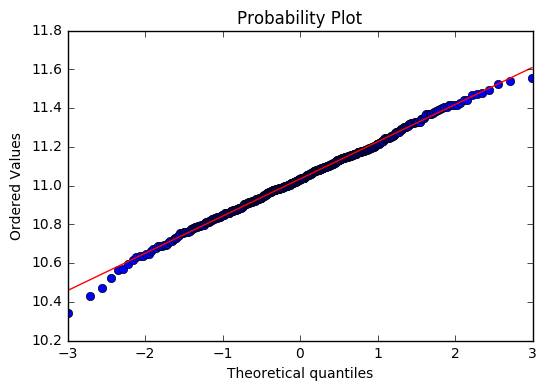

In [40]:
probplot(means, plot=plt)

((array([  9581.17155468,   9619.97390784,   9641.8384813 ,   9657.36210774,
           9669.53740626,   9679.62373538,   9688.27504193,   9695.87621501,
           9702.6736663 ,   9708.83502299,   9714.47968177,   9719.6958101 ,
           9724.5504365 ,   9729.09575518,   9733.37323423,   9737.41638823,
           9741.25270565,   9744.9050233 ,   9748.39252839,   9751.73150335,
           9754.93588897,   9758.01771684,   9760.98744579,   9763.85422707,
           9766.62611558,   9769.31023996,   9771.91294064,   9774.43988312,
           9776.89615134,   9779.28632551,   9781.61454713,   9783.88457391,
           9786.09982624,   9788.26342682,   9790.37823459,   9792.44687396,
           9794.47176004,   9796.45512059,   9798.39901509,   9800.30535152,
           9802.17590097,   9804.01231064,   9805.81611523,   9807.58874709,
           9809.33154525,   9811.04576343,   9812.73257725,   9814.39309062,
           9816.0283416 ,   9817.63930755,   9819.22690987,   9820.7920182 ,

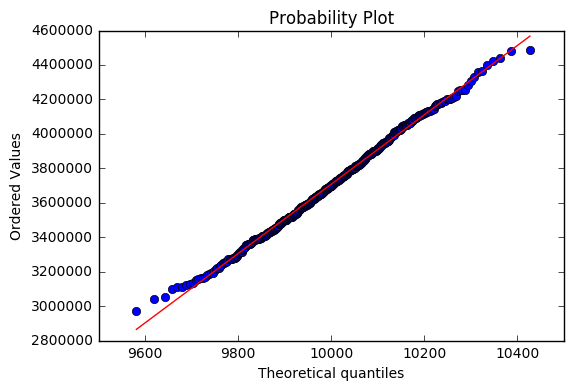

In [43]:
probplot(devs, dist="chi2", sparams=(10000-1), plot=plt)

### 5

In [46]:
exp_sum_clicks = data_exp.groupby('userID').n_clicks.sum()
con_sum_clicks = data_control.groupby('userID').n_clicks.sum()

In [47]:
from scipy.stats import mannwhitneyu

In [48]:
mannwhitneyu(exp_sum_clicks, con_sum_clicks)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

### 6

In [49]:
data.browser.unique()

array(['Browser #2', 'Browser #4', 'Browser #14', 'Browser #17',
       'Browser #20', 'Browser #22'], dtype=object)

In [53]:
ps = []
nc_exp = []
nc_con = []
for browser in data.browser.unique():
    exp = data_exp.loc[data.browser==browser, "n_clicks"]
    con = data_control.loc[data.browser==browser, "n_clicks"]
    nc_exp.append(data_exp.loc[data.browser==browser, "n_nonclk_queries"].sum()/float(data_exp.loc[data.browser==browser, "n_queries"].sum()))
    nc_con.append(data_control.loc[data.browser==browser, "n_nonclk_queries"].sum()/float(data_control.loc[data.browser==browser, "n_queries"].sum()))
    ps.append(mannwhitneyu(exp, con).pvalue)

In [51]:
from statsmodels.sandbox.stats.multicomp import multipletests

In [52]:
multipletests(ps)

(array([False, False,  True, False, False, False], dtype=bool),
 array([ 0.12899649,  0.64906956,  0.        ,  0.14141688,  0.64906956,
         0.59049882]),
 0.008512444610847103,
 0.008333333333333333)

In [54]:
nc_exp

[0.449827469485547,
 0.4514294190358467,
 0.4375561736127329,
 0.3693741284866483,
 0.3897737648371716,
 0.3985394721969546]

In [55]:
nc_con

[0.4596274717919465,
 0.4697092963514274,
 0.5759041136008114,
 0.36299366746282086,
 0.4054048474338329,
 0.40593976593513353]